In [1]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

### Reading the first frame of the video

In [4]:
source = './race_car.mp4'
cap = cv2.VideoCapture(source)

return_value, frame = cap.read()

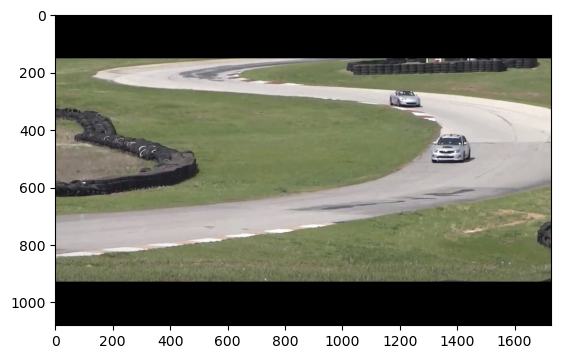

In [7]:
plt.imshow(frame[..., ::-1]) # frame = (height, width, channels)
# ... means take all heights and widths but for channels ill convert it into rgb first.

### Display Video from the file

In [11]:
from IPython.display import HTML
HTML("""
     <video width = 1024 controls>
        <soruce src = "race_car.mp4" type = "video/mp4">
     </video>
     """)

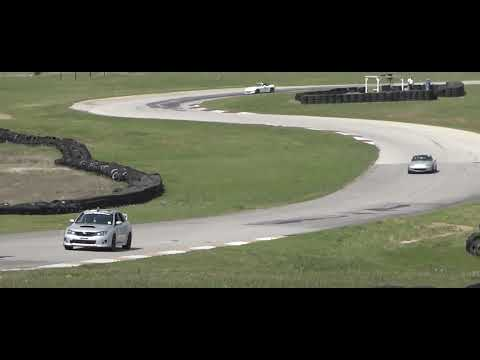

In [14]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)

In [15]:
# Default resolutions of the frame
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define codecs and create VideoWriter objects
out_avi = cv2.VideoWriter("race_car_out.avi",
                          cv2.VideoWriter_fourcc("M", "J", "P", "G"),
                          10,
                          (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4",
                          cv2.VideoWriter_fourcc(*"XVID"),
                          10,
                          (frame_width, frame_height))

In [16]:
# Read until video is completed
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        # Write frame to output files
        out_avi.write(frame)
        out_mp4.write(frame)
    else:
        break

# Release everything
cap.release()
out_avi.release()
out_mp4.release()